In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import generate_data as gd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X,y = gd.gaussian_clusters(nr_features=30, nr_classes=20, nr_data_points=200, random_diag=True,\
                           super_mega_random=False, variance_size=5, mean_variance=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [13]:
knn = KNeighborsClassifier(n_neighbors=20)

lda = LinearDiscriminantAnalysis()

folds = 5
num_feat = 30

sfs = SFS(lda,
           k_features=(1, num_feat),
           forward=True,
           floating=False,
           verbose=0,
           scoring='accuracy',
           cv=folds)

sfs = sfs.fit(X_train, y_train)

sbs = SFS(lda,
           k_features=(1, num_feat),
           forward=False,
           floating=False,
           verbose=0,
           scoring='accuracy',
           cv=folds)

sbs = sbs.fit(X_train, y_train)

In [14]:
# Accuracy for forward SFS
wrap_feat = list(sfs.k_feature_idx_)
print("Features chosen by forward seq wrapping {}" .format(wrap_feat))
lda.fit(X_train[:, wrap_feat], y_train)

y_train_pred = lda.predict(X_train[:, wrap_feat])
print("Training acc after forward seq wrapping: %.3f" % accuracy_score(y_train, y_train_pred))

y_test_pred = lda.predict(X_test[:, wrap_feat])
print("Test acc after forward seq wrapping: %.3f" % accuracy_score(y_test, y_test_pred))

# Accuracy for backward SFS
wrap_feat = list(sbs.k_feature_idx_)
print("\nFeatures chosen by backward seq wrapping {}" .format(wrap_feat))
lda.fit(X_train[:, wrap_feat], y_train)

y_train_pred = lda.predict(X_train[:, wrap_feat])
print("Training acc after backward seq wrapping: %.3f" % accuracy_score(y_train, y_train_pred))

y_test_pred = lda.predict(X_test[:, wrap_feat])
print("Test acc after backward seq wrapping: %.3f" % accuracy_score(y_test, y_test_pred))

# Accuracy for entire feature space
lda.fit(X_train,y_train)

y_train_pred = lda.predict(X_train)
print("\nTraining acc on all data: %.3f" % accuracy_score(y_train, y_train_pred))

y_test_pred = lda.predict(X_test)
print("Test acc on all data: %.3f" % accuracy_score(y_test, y_test_pred))

Features chosen by forward seq wrapping [2, 4, 15, 18]
Training acc after forward seq wrapping: 0.393
Test acc after forward seq wrapping: 0.348

Features chosen by backward seq wrapping [3, 4, 15, 16, 25, 27]
Training acc after backward seq wrapping: 0.426
Test acc after backward seq wrapping: 0.403

Training acc on all data: 0.439
Test acc on all data: 0.387


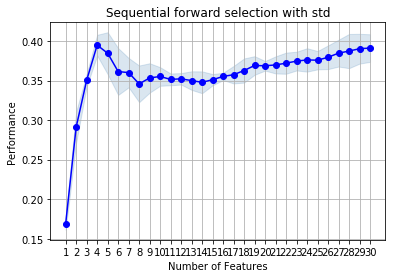

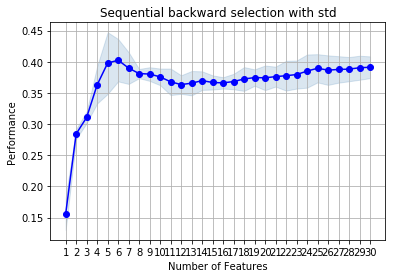

In [15]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential forward selection with std')
plt.grid()

plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential backward selection with std')
plt.grid()

plt.show()

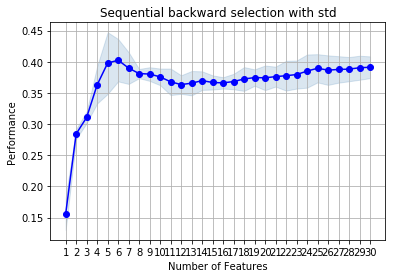

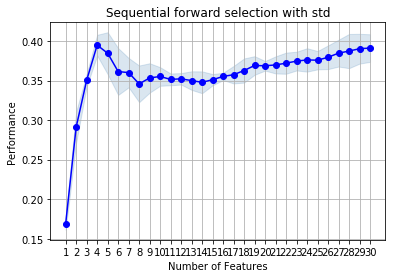

In [31]:
import time

def seq_feat_sel(X_train, X_test, y_train, y_test, num_feat = 10,\
                 forward_sfs=True, class_alg=LinearDiscriminantAnalysis(), folds=5):
    
    start = time.time()
    sfs = SFS(class_alg,
           k_features=(1, num_feat),
           forward=forward_sfs,
           floating=False,
           verbose=0,
           scoring='accuracy',
           cv=folds)
    sfs = sfs.fit(X_train, y_train)
    end = time.time()
    sfs_time = end-start
    
    # Accuracy for test data
    wrap_feat_sfs = list(sfs.k_feature_idx_)
    class_alg.fit(X_train[:, wrap_feat_sfs], y_train)
    y_test_pred = class_alg.predict(X_test[:, wrap_feat_sfs])
    sfs_acc = accuracy_score(y_test, y_test_pred)
    
    return sfs_time, sfs_acc, wrap_feat_sfs


def Plot_cv_train_acc_SFS(sfs, direc_str="forward"):
    plot_sfs(sfs.get_metric_dict(), kind='std_dev')
    plt.title('Sequential %s selection with std' %(direc_str))
    plt.grid()

    plt.show()
    

time, accuracy, features = seq_feat_sel(X_train, X_test, y_train, y_test, num_feat=2)
Plot_cv_train_acc_SFS(sbs, "backward") 
Plot_cv_train_acc_SFS(sfs, "forward")

In [28]:
print(time)
print(accuracy)
print(features)

1.890974998474121
0.2803030303030303
[2, 18]
